In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
data = pd.read_csv(r'C:\Users\Rajashri\Desktop\food_analysis\Package delivery\package_delivery_data.csv')

In [3]:
print(data.shape)
data.head(5)

(500, 7)


,order_id,order_price,customer_lat,customer_lon,distance_to_customer_KM,delivery_fee,weight_in_kg
0,ORDA00111,107.00,12.9150,77.5533,10.621,13.402307,75.50
1,ORDA00121,141.00,12.1193,77.6399,4.777,10.433114,45.10
2,ORDA00149,1051.60,12.9561,77.5921,20.673,16.634749,724.50
3,ORDA00251,211.25,12.9369,77.6407,3.560,4.621715,50.00
4,ORDA00506,222.50,13.0151,77.5390,15.953,15.251116,117.25


In [4]:
# Reordering the columns
data = data.reindex(['order_id', 'customer_lat', 'customer_lon', 'distance_to_customer_KM', 'weight_in_kg', 'order_price',
                     'delivery_fee'], axis='columns')

In [5]:
print(data.shape)
data.head(5)

(500, 7)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,order_price,delivery_fee
0,ORDA00111,12.9150,77.5533,10.621,75.50,107.00,13.402307
1,ORDA00121,12.1193,77.6399,4.777,45.10,141.00,10.433114
2,ORDA00149,12.9561,77.5921,20.673,724.50,1051.60,16.634749
3,ORDA00251,12.9369,77.6407,3.560,50.00,211.25,4.621715
4,ORDA00506,13.0151,77.5390,15.953,117.25,222.50,15.251116


### Data Processing

In [6]:
data.describe()

,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,order_price,delivery_fee
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12.919211,77.593198,11.480185,186.287480,453.364100,13.634893
std,0.199187,0.051695,7.005479,209.572766,273.194527,2.577819
min,12.113400,77.414200,1.000000,2.100000,10.100000,1.094312
25%,12.926100,77.563300,6.133500,53.400000,233.625000,12.410589
50%,12.966200,77.590000,11.558000,91.375000,410.625000,13.758037
75%,12.992500,77.622100,16.736000,290.600000,624.000000,15.154056
max,13.102000,77.751200,25.000000,991.500000,1465.500000,22.112749


### Exploratory Analysis

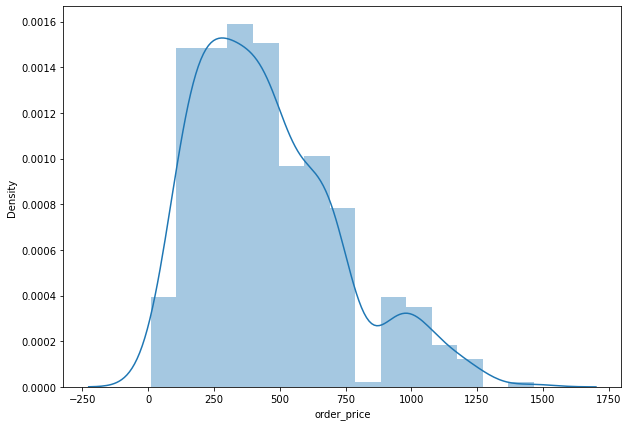

In [7]:
# The price distribution of the orders
fig = plt.figure(figsize=(10,7)) 
ax = sns.distplot(data['order_price'])

In [8]:
minPrice = min(data.order_price)
maxPrice = max(data.order_price)
print('Min order price :', minPrice)
print('Max order price :', maxPrice)

Min order price : 10.1
Max order price : 1465.5


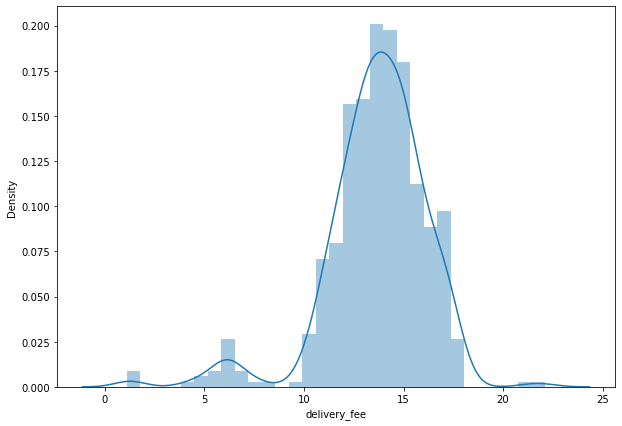

In [9]:
# The delivery fee distribution of the orders
fig = plt.figure(figsize=(10,7)) 
ax = sns.distplot(data['delivery_fee'])

In [10]:
minFee = min(data.delivery_fee)
maxFee = max(data.delivery_fee)
print('Min delivery fee :', minFee)
print('Max delivery fee :', maxFee)

Min delivery fee : 1.0943121
Max delivery fee : 22.1127494


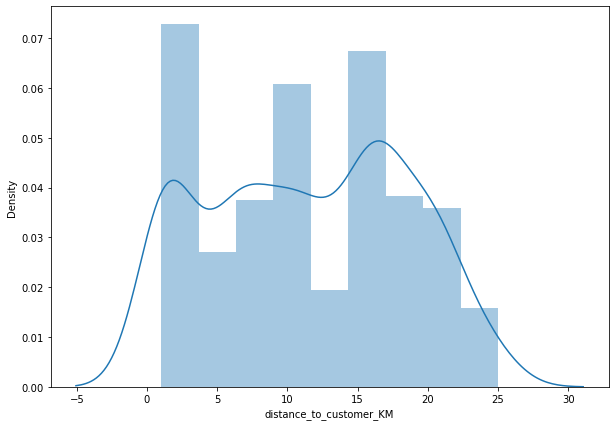

In [11]:
# The customer distance distribution of the orders
fig = plt.figure(figsize=(10,7)) 
ax = sns.distplot(data['distance_to_customer_KM'])

In [12]:
minDist = min(data.distance_to_customer_KM)
maxDist = max(data.distance_to_customer_KM)
print('Min Distance (in km) :', minDist)
print('Max Distance (in km) :', maxDist)

Min Distance (in km) : 1.0
Max Distance (in km) : 25.0


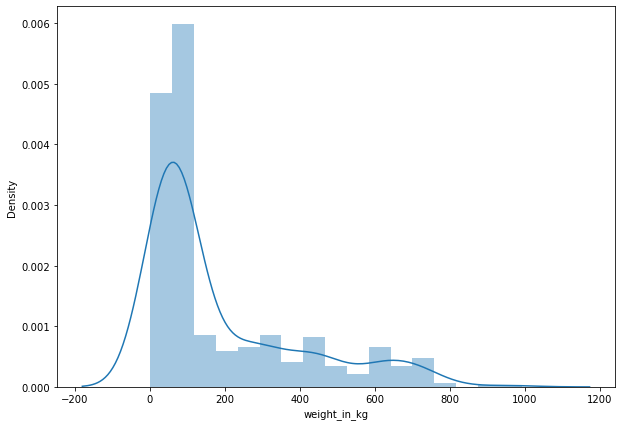

In [13]:
# The weight distribution of the orders
fig = plt.figure(figsize=(10,7)) 
ax = sns.distplot(data['weight_in_kg'])

In [14]:
minWeight = min(data.weight_in_kg)
maxWeight = max(data.weight_in_kg)
print('Min Weight (in gm) :', minWeight)
print('Max Weight (in gm) :', maxWeight)

Min Weight (in gm) : 2.1
Max Weight (in gm) : 991.5


### Mapping: Get the address from the latitude and longitude

In [15]:
# Convert the latitudes and longitudes into string and append them into a list
latitudes = []
for lat in data['customer_lat']:
    latitudes.append(str(lat))

longitudes = []
for lon in data['customer_lon']:
    longitudes.append(str(lon))

In [16]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

In [17]:
def get_address(latitude, longitude):
    address = []
    for latitude in latitudes:
        for longitude in longitudes:
            # Get location with geocode
            location = geolocator.geocode(latitude + "," + longitude)
            address.append(str(location))
            return address

In [18]:
# Calling the function with custom values
get_address("12.9850", "77.5533")

['Seven Hills Layout, Vasanthpura Ward, Bommanahalli Zone, Bengaluru, Bangalore South, Bangalore Urban, Karnataka, 560061, India']

### Reverse Mapping: Get the latitude and longitude from the address

In [19]:
def get_latlon(address):
    # Provide the address
    location = geolocator.geocode(address)
    print("The latitude of the location is: ", location.latitude)
    print("The longitude of the location is: ", location.longitude)
    return (location.latitude, location.longitude)

In [20]:
# Calling the function with custom values
get_latlon("Seven Hills Layout, Vasanthpura Ward, Bommanahalli Zone, Bengaluru, Bangalore South, Bangalore Urban, Karnataka, 560061, India")

The latitude of the location is:  12.9140392
The longitude of the location is:  77.5521201


(12.9140392, 77.5521201)

### Plot the points on the map 

In [21]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [22]:
# First, pass in the median of the latitude and longitude coordinates so as to centre the map there
map1 = folium.Map(location=[data.customer_lat.median(), data.customer_lon.median()], tiles='cartodbpositron',
                  control_scale=True)


# Now, iterate through each row of the dataframe, and pass the latitude and longitudes to the map
for index, location_info in data.iterrows():
    folium.Marker([location_info['customer_lat'], location_info['customer_lon']], 
                  zoom_start=20, popup=location_info['distance_to_customer_KM']).add_to(map1)
    

# create a map
map1.save("map1.html")
# Displaying the map
map1

### Clustered Location on the map

In [23]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

In [24]:
# First, pass in the median of the latitude and longitude coordinates so as to centre the map there
map2 = folium.Map(location=[data.customer_lat.median(), data.customer_lon.median()], tiles='cartodbpositron',
                  zoom_start=13, control_scale=True)

# Adding points to the map
mc = MarkerCluster().add_to(map2)

for index, location_info in data.iterrows():
    folium.Marker([location_info['customer_lat'], location_info['customer_lon']]).add_to(mc)
folium.LayerControl().add_to(map2)

# Displaying the map
map2.save("map2.html")
map2

In [25]:
# Check if we have any null values
data.isnull().sum()

order_id                   0
customer_lat               0
customer_lon               0
distance_to_customer_KM    0
weight_in_kg               0
order_price                0
delivery_fee               0
dtype: int64

In [26]:
# check for categorical columns
cat_col = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['order_id']

In [27]:
delivery = data.copy()

print(delivery.shape)
delivery.head(5)

(500, 7)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,order_price,delivery_fee
0,ORDA00111,12.9150,77.5533,10.621,75.50,107.00,13.402307
1,ORDA00121,12.1193,77.6399,4.777,45.10,141.00,10.433114
2,ORDA00149,12.9561,77.5921,20.673,724.50,1051.60,16.634749
3,ORDA00251,12.9369,77.6407,3.560,50.00,211.25,4.621715
4,ORDA00506,13.0151,77.5390,15.953,117.25,222.50,15.251116


### Let's decide which vehicle should carry the package depending on distance and weight 

In [28]:
minWeight = min(delivery.weight_in_kg)
maxWeight = max(delivery.weight_in_kg)
print('Min Weight (in gm) :', minWeight)
print('Max Weight (in gm) :', maxWeight)

Min Weight (in gm) : 2.1
Max Weight (in gm) : 991.5


In [29]:
minDist = min(data.distance_to_customer_KM)
maxDist = max(data.distance_to_customer_KM)
print('Min Distance (in km) :', minDist)
print('Max Distance (in km) :', maxDist)

Min Distance (in km) : 1.0
Max Distance (in km) : 25.0


In [30]:
# According to distance and weight, some ranges can be determined and categorical variables can then be assigned
# --->> distance (hyper-local: 0-25km) <<---
# pedestrian (20kg, 2km)
# cycle (50kg, 5km)
# moped (100kg, 15km)
# delivery van (1000kg, 25km)

In [31]:
# Creating new feature 'vehicle' based on distance and weight
vehicle = pd.Series(["Pedestrian", "Bicycle", "Moped", "Delivery van"], dtype = "category")
delivery["vehicle"] = vehicle

# Deciding the ranges
delivery.loc[((delivery['distance_to_customer_KM'] <= 2) & (delivery["weight_in_kg"] <= 20)), "vehicle"] = vehicle[0]

delivery.loc[(((delivery["distance_to_customer_KM"] > 2) & (delivery["distance_to_customer_KM"] <= 5)) &
              ((delivery["weight_in_kg"] > 20) & (delivery["weight_in_kg"] <= 50))), "vehicle"] = vehicle[1]

delivery.loc[(((delivery["distance_to_customer_KM"] > 5) & (delivery["distance_to_customer_KM"] <= 15)) &
              ((delivery["weight_in_kg"] > 50) & (delivery["weight_in_kg"] <= 100))), "vehicle"] = vehicle[2]

delivery.loc[((delivery['distance_to_customer_KM'] > 15) & (delivery["weight_in_kg"] > 100)), "vehicle"] = vehicle[3]

In [32]:
delivery.head(5)

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,order_price,delivery_fee,vehicle
0,ORDA00111,12.9150,77.5533,10.621,75.50,107.00,13.402307,Moped
1,ORDA00121,12.1193,77.6399,4.777,45.10,141.00,10.433114,Bicycle
2,ORDA00149,12.9561,77.5921,20.673,724.50,1051.60,16.634749,Delivery van
3,ORDA00251,12.9369,77.6407,3.560,50.00,211.25,4.621715,Bicycle
4,ORDA00506,13.0151,77.5390,15.953,117.25,222.50,15.251116,Delivery van


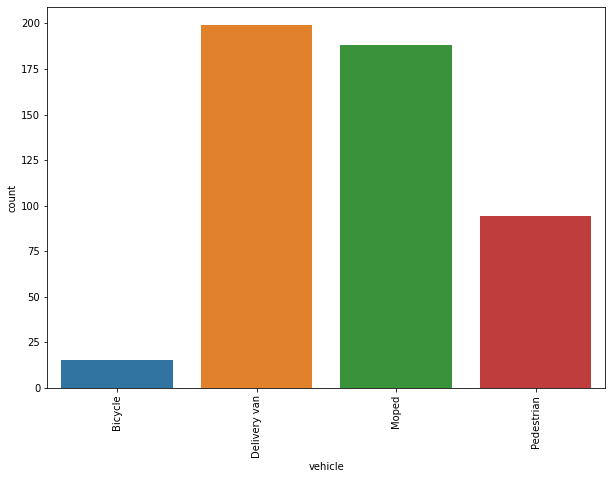

In [33]:
# Plot count of weights carried by vehicle
plt.figure(figsize=(10,7))
sns.countplot(delivery['vehicle'])
plt.xticks(rotation="vertical")
plt.show()

In [34]:
delivery = delivery[['order_id','customer_lat','customer_lon','distance_to_customer_KM','weight_in_kg','vehicle',
                     'order_price','delivery_fee']]
delivery.head(5)

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee
0,ORDA00111,12.9150,77.5533,10.621,75.50,Moped,107.00,13.402307
1,ORDA00121,12.1193,77.6399,4.777,45.10,Bicycle,141.00,10.433114
2,ORDA00149,12.9561,77.5921,20.673,724.50,Delivery van,1051.60,16.634749
3,ORDA00251,12.9369,77.6407,3.560,50.00,Bicycle,211.25,4.621715
4,ORDA00506,13.0151,77.5390,15.953,117.25,Delivery van,222.50,15.251116


### Let's generate the optimal routes for each vehicle

In [35]:
# Creating separate dataframes for each vehicle
pedestrian_df = delivery[delivery['vehicle'] == 'Pedestrian']
cycle_df = delivery[delivery['vehicle'] == 'Bicycle']
moped_df = delivery[delivery['vehicle'] == 'Moped']
van_df = delivery[delivery['vehicle'] == 'Delivery van']

### Generating the optimal route for pedestrian

In [36]:
print(pedestrian_df.shape)
pedestrian_df.head(5)

(94, 8)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee
5,ORDA00541,12.9713,77.6401,1.253,7.11,Pedestrian,349.0,13.619411
15,ORDA02556,13.0417,77.5923,1.975,5.75,Pedestrian,395.5,16.031712
17,ORDA03219,12.9041,77.6121,1.363,13.53,Pedestrian,152.0,15.619022
31,ORDA05762,12.9190,77.5332,1.540,11.16,Pedestrian,231.5,15.003994
34,ORDA06135,13.0067,77.5450,1.047,10.25,Pedestrian,416.0,13.192551


#### Get the optimal number of Clusters

In [37]:
# Define the 'features' and 'labels'
X = pedestrian_df.iloc[:, 1:3]

In [38]:
X

,customer_lat,customer_lon
5,12.9713,77.6401
15,13.0417,77.5923
17,12.9041,77.6121
31,12.9190,77.5332
34,13.0067,77.5450
...,...,...
486,12.9337,77.5900
491,13.0503,77.5529
496,12.9041,77.6121
497,12.9343,77.6044


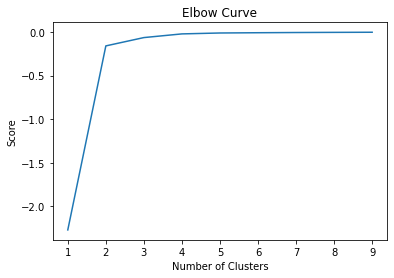

In [39]:
from sklearn.cluster import KMeans

kmeans = []
K_clusters = range(1,10)
for i in K_clusters:
    kmeans.append(KMeans(n_clusters=i))

Y_axis = X[['customer_lat']]
X_axis = X[['customer_lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### Clustering using K-Means and Assigning Clusters to our Data

In [40]:
# 'k-means++' selects initial cluster centers for k-means clustering in a smart way to speed up convergence
kmeans = KMeans(n_clusters = 3, init ='k-means++')

# Compute k-means clustering
kmeans.fit(X)
centers = kmeans.cluster_centers_
clusters = kmeans.predict(X)
X['cluster_label'] = clusters
X.head(10)

,customer_lat,customer_lon,cluster_label
5,12.9713,77.6401,0
15,13.0417,77.5923,2
17,12.9041,77.6121,0
31,12.9190,77.5332,2
34,13.0067,77.5450,2
47,13.0019,77.5713,2
64,12.9306,77.5434,2
67,12.9369,77.6407,0
74,13.0067,77.5450,2
82,12.9691,77.7500,0


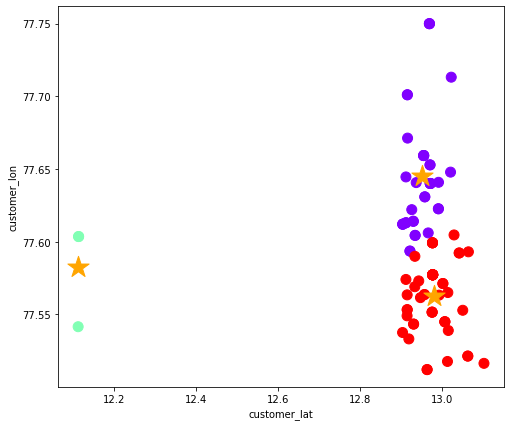

In [41]:
# Visualize the Clusters
plt.figure(figsize=(8,7))
plt.scatter(x=X['customer_lat'], y=X['customer_lon'], c=clusters, s=100, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=500, marker='*')
plt.xlabel('customer_lat')
plt.ylabel('customer_lon')
plt.show()

In [42]:
kmeans.cluster_centers_

array([[12.95008974, 77.64554872],
       [12.11413333, 77.58293333],
       [12.97975385, 77.56261154]])

In [43]:
X = X.loc[:, ['cluster_label']]

In [44]:
# Concat the dataframes
pedestrian_df = pd.concat([pedestrian_df, X], axis=1, join='inner')
print(pedestrian_df.shape)
pedestrian_df.head(10)

(94, 9)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee,cluster_label
5,ORDA00541,12.9713,77.6401,1.253,7.11,Pedestrian,349.0,13.619411,0
15,ORDA02556,13.0417,77.5923,1.975,5.75,Pedestrian,395.5,16.031712,2
17,ORDA03219,12.9041,77.6121,1.363,13.53,Pedestrian,152.0,15.619022,0
31,ORDA05762,12.9190,77.5332,1.540,11.16,Pedestrian,231.5,15.003994,2
34,ORDA06135,13.0067,77.5450,1.047,10.25,Pedestrian,416.0,13.192551,2
47,ORDA09614,13.0019,77.5713,1.975,9.50,Pedestrian,225.0,14.450127,2
64,ORDB01909,12.9306,77.5434,1.497,9.94,Pedestrian,1007.0,12.399299,2
67,ORDB02611,12.9369,77.6407,1.311,14.20,Pedestrian,407.5,12.459244,0
74,ORDB04429,13.0067,77.5450,1.500,15.30,Pedestrian,110.1,13.755330,2
82,ORDB05520,12.9691,77.7500,1.109,12.50,Pedestrian,109.0,12.154006,0


#### Converting Longitude and Latitude into Cartesian X and Y
#### ** R of earth =6371 KM **
#### x = R * cos( radiance(lat) ) * cos(radiance (lon))
#### y = R * cos( radiance(lat) ) * sin(radiance (lon))

In [45]:
from math import radians,cos,sin

lat = pedestrian_df["customer_lat"].map(radians)
lon = pedestrian_df["customer_lon"].map(radians)
x = lon.map(cos)*lat.map(cos)*6371
y= lon.map(cos)*lat.map(sin)*6371

pedestrian_df["lat_radians"] = lat
pedestrian_df["lon_radians"] = lon
pedestrian_df["x"] = x
pedestrian_df["y"] = y
pedestrian_df.head(5)

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee,cluster_label,lat_radians,lon_radians,x,y
5,ORDA00541,12.9713,77.6401,1.253,7.11,Pedestrian,349.0,13.619411,0,0.226392,1.355075,1328.924886,306.105414
15,ORDA02556,13.0417,77.5923,1.975,5.75,Pedestrian,395.5,16.031712,2,0.227621,1.354241,1333.605311,308.909552
17,ORDA03219,12.9041,77.6121,1.363,13.53,Pedestrian,152.0,15.619022,0,0.225219,1.354587,1332.247321,305.225705
31,ORDA05762,12.9190,77.5332,1.540,11.16,Pedestrian,231.5,15.003994,2,0.225479,1.353210,1340.518745,307.487664
34,ORDA06135,13.0067,77.5450,1.047,10.25,Pedestrian,416.0,13.192551,2,0.227010,1.353416,1338.798196,309.250822


In [46]:
new_df1 = pedestrian_df[['x','y']]
new_df1.head(5)

,x,y
5,1328.924886,306.105414
15,1333.605311,308.909552
17,1332.247321,305.225705
31,1340.518745,307.487664
34,1338.798196,309.250822


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
scaled_df1 = scaler.fit_transform(new_df1)
scaled_df1 = pd.DataFrame(scaled_df1, columns=['x', 'y'])

In [48]:
scaled1 = np.asarray(scaled_df1)
scaled1

array([[ 43.83467678,  75.84210322],
       [ 61.48589721,  86.99178617],
       [ 56.36452831,  72.34424303],
       [ 87.55843941,  81.33814199],
       [ 81.06975842,  88.34872834],
       [ 70.67371691,  85.34810176],
       [ 83.25289416,  81.43187581],
       [ 44.28733535,  72.61138687],
       [ 81.06975842,  88.34872834],
       [  0.        ,  64.98491616],
       [ 68.78445601,  82.45757489],
       [ 75.15416934,   0.        ],
       [ 81.29952988,  79.40394744],
       [ 43.83467678,  75.84210322],
       [ 60.01262232,  80.28736242],
       [ 86.1117767 ,  79.4905852 ],
       [ 60.01262232,  80.28736242],
       [ 38.73919077,  74.53673477],
       [ 81.06975842,  88.34872834],
       [ 79.06644884,  84.82858371],
       [ 43.83467678,  75.84210322],
       [ 57.50878475,  78.66627212],
       [ 79.61712287,  79.02654361],
       [ 60.71089395,  88.98668747],
       [ 68.78445601,  82.45757489],
       [ 51.93003931,  73.41213358],
       [ 71.14662434,  79.72160663],
 

### Travelling Salesman problem

In [49]:
# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(c[r[p+1]]-c[r[p]]) for p in range(len(r)-1)])
# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

# 2-opt Algorithm
def two_opt(cities,improvement_threshold):
    # Make an array of row numbers corresponding to cities.
    route = np.arange(cities.shape[0])
    improvement_factor = 1
    # Calculate the distance of the initial path.
    best_distance = path_distance(route,cities)
    # If the route is still improving, keep going!
    while improvement_factor > improvement_threshold:
        distance_to_beat = best_distance                                  # Record the distance at the beginning of the loop
        for swap_first in range(0,len(route)-2):                          # From each city except the first and last,
            for swap_last in range(swap_first+1,len(route)):              # to each of the cities following,
                new_route = two_opt_swap(route,swap_first,swap_last)      # try reversing the order of these cities
                new_distance = path_distance(new_route,cities)            # and check the total distance with this modification.
                # If the path distance is an improvement, make this the accepted best route.
                if new_distance < best_distance:
                    route = new_route
                    best_distance = new_distance
        # Calculate how much the route has improved.
        improvement_factor = 1 - best_distance/distance_to_beat
    # When the route is no longer improving substantially, stop searching and return the route.
    return route

In [50]:
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
pedestrian_route = two_opt(scaled1, 0.001)
pedestrian_route

array([57, 11, 69, 43, 36, 89, 93, 10, 82, 78, 75, 74, 61, 24, 55, 45, 40,
       26, 63, 44, 77, 86, 76, 79, 64, 22, 87, 12, 58,  6, 15,  3, 73, 49,
       56, 41, 83, 84, 37,  4,  8, 18, 32, 19, 62, 90, 67, 81,  5, 60,  1,
       23, 59, 68, 35, 21, 16, 14, 34, 53, 70, 92,  2, 91, 65, 38, 66, 39,
       33, 25, 85, 42, 48,  7,  0, 54, 13, 20, 27, 31, 88, 17, 30, 72, 80,
       52, 29, 71, 50, 51, 47,  9, 28, 46])

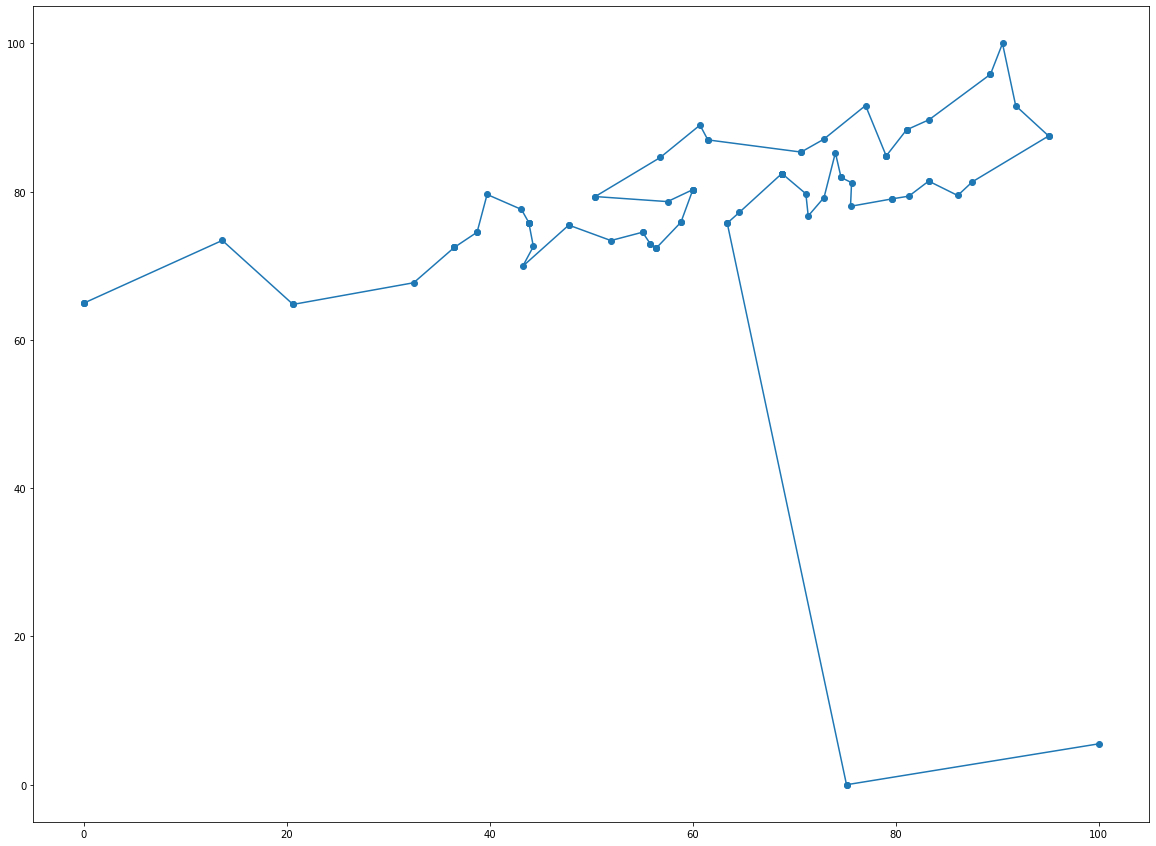

Distance_scaled: 336.05762779119397


In [51]:
plt.figure(figsize=(20,15))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order1 = np.array([scaled1[pedestrian_route[i]] for i in range(len(pedestrian_route))])

# Plot the cities.
plt.scatter(scaled1[:,0], scaled1[:,1])

# Plot the path.
plt.plot(new_cities_order1[:,0], new_cities_order1[:,1])
plt.show()

# Print the route as row numbers and the total distance travelled by the path.
print("Distance_scaled: " + str(path_distance(pedestrian_route, scaled1)))

#### Arrange rows according to route matrix

In [52]:
delivery_order1 = pd.DataFrame(pedestrian_route, columns=["index"])
delivery_order1

,index
0,57
1,11
2,69
3,43
4,36
...,...
89,51
90,47
91,9
92,28


In [53]:
pedestrian_df = pedestrian_df.reset_index(drop=True)

In [54]:
travel1 = pd.concat([pedestrian_df, delivery_order1], axis=1)
travel1

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee,cluster_label,lat_radians,lon_radians,x,y,index
0,ORDA00541,12.9713,77.6401,1.253,7.11,Pedestrian,349.0,13.619411,0,0.226392,1.355075,1328.924886,306.105414,57
1,ORDA02556,13.0417,77.5923,1.975,5.75,Pedestrian,395.5,16.031712,2,0.227621,1.354241,1333.605311,308.909552,11
2,ORDA03219,12.9041,77.6121,1.363,13.53,Pedestrian,152.0,15.619022,0,0.225219,1.354587,1332.247321,305.225705,69
3,ORDA05762,12.9190,77.5332,1.540,11.16,Pedestrian,231.5,15.003994,2,0.225479,1.353210,1340.518745,307.487664,43
4,ORDA06135,13.0067,77.5450,1.047,10.25,Pedestrian,416.0,13.192551,2,0.227010,1.353416,1338.798196,309.250822,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,ORDZ06707,12.9337,77.5900,1.155,2.10,Pedestrian,1101.0,15.016622,2,0.225736,1.354201,1334.428659,306.451123,51
90,ORDZ07516,13.0503,77.5529,1.212,9.91,Pedestrian,142.0,13.675792,2,0.227771,1.353553,1337.726855,310.075817,47
91,ORDZ09721,12.9041,77.6121,1.213,9.30,Pedestrian,150.0,14.660156,0,0.225219,1.354587,1332.247321,305.225705,9
92,ORDZ10116,12.9343,77.6044,1.936,2.60,Pedestrian,252.0,14.516572,0,0.225746,1.354452,1332.901291,306.115058,28


In [55]:
travel1.rename(columns = {'index':'delivery_allocation_order'}, inplace = True)

In [56]:
travel1 = travel1[['order_id','customer_lat','customer_lon','distance_to_customer_KM','weight_in_kg',
                   'order_price','delivery_fee','cluster_label','delivery_allocation_order']]

In [57]:
travel1 = travel1.sort_values(by=['delivery_allocation_order'], ascending=True)
travel1

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,order_price,delivery_fee,cluster_label,delivery_allocation_order
74,ORDY09112,12.9770,77.5773,1.941,2.50,215.0,14.396290,2,0
50,ORDJ10007,12.9154,77.7011,1.536,12.30,591.0,5.751492,0,1
62,ORDX04103,12.9757,77.5516,1.151,7.60,910.0,16.171902,2,2
31,ORDI03291,12.9913,77.6409,1.494,4.44,1151.0,16.721734,0,3
39,ORDI09427,12.9299,77.6141,1.519,9.50,307.0,15.731100,0,4
...,...,...,...,...,...,...,...,...,...
5,ORDA09614,13.0019,77.5713,1.975,9.50,225.0,14.450127,2,89
45,ORDJ02934,12.9770,77.5773,1.139,14.50,523.5,12.245413,2,90
63,ORDX04290,12.9119,77.5741,1.211,5.35,46.4,14.306933,2,91
61,ORDX02361,12.9770,77.5773,1.224,12.51,703.0,15.373307,2,92


#### Get the first 10 orders to be allocated for delivery to pedestrian

In [58]:
# First 10 orders
first_ten = travel1[['order_id','delivery_allocation_order']].head(10)
first_ten = first_ten.reset_index(drop=True)
first_ten

,order_id,delivery_allocation_order
0,ORDY09112,0
1,ORDJ10007,1
2,ORDX04103,2
3,ORDI03291,3
4,ORDI09427,4
5,ORDJ06131,5
6,ORDI02711,6
7,ORDY07760,7
8,ORDI10037,8
9,ORDZ09721,9


### Generating the optimal route for bicycle

In [59]:
print(cycle_df.shape)
cycle_df.head(5)

(15, 8)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee
1,ORDA00121,12.1193,77.6399,4.777,45.10,Bicycle,141.00,10.433114
3,ORDA00251,12.9369,77.6407,3.560,50.00,Bicycle,211.25,4.621715
8,ORDA01361,12.1145,77.6036,4.926,41.30,Bicycle,401.00,12.342514
20,ORDA03791,12.9770,77.5773,4.704,41.12,Bicycle,970.00,10.771145
40,ORDA07592,12.9150,77.5533,2.075,29.70,Bicycle,351.10,9.773439


#### Get the optimal number of Clusters

In [60]:
# Define the 'features' and 'labels'
X = cycle_df.iloc[:, 1:3]

In [61]:
X

,customer_lat,customer_lon
1,12.1193,77.6399
3,12.9369,77.6407
8,12.1145,77.6036
20,12.9770,77.5773
40,12.9150,77.5533
48,12.9561,77.5921
301,12.9770,77.5773
314,13.0417,77.5923
317,13.0019,77.5713
323,12.9579,77.6309


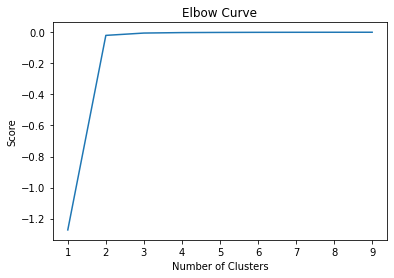

In [62]:
from sklearn.cluster import KMeans

kmeans = []
K_clusters = range(1,10)
for i in K_clusters:
    kmeans.append(KMeans(n_clusters=i))

Y_axis = X[['customer_lat']]
X_axis = X[['customer_lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### Clustering using K-Means and Assigning Clusters to our Data

In [63]:
# 'k-means++' selects initial cluster centers for k-means clustering in a smart way to speed up convergence
kmeans = KMeans(n_clusters = 3, init ='k-means++')

# Compute k-means clustering
kmeans.fit(X)
centers = kmeans.cluster_centers_
clusters = kmeans.predict(X)
X['cluster_label'] = clusters
X.head(10)

,customer_lat,customer_lon,cluster_label
1,12.1193,77.6399,1
3,12.9369,77.6407,0
8,12.1145,77.6036,1
20,12.9770,77.5773,2
40,12.9150,77.5533,0
48,12.9561,77.5921,0
301,12.9770,77.5773,2
314,13.0417,77.5923,2
317,13.0019,77.5713,2
323,12.9579,77.6309,0


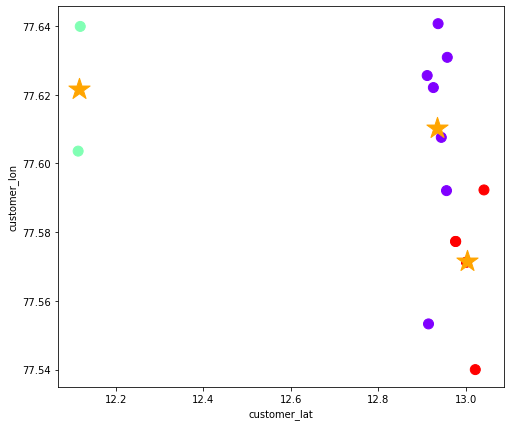

In [64]:
# Visualize the Clusters
plt.figure(figsize=(8,7))
plt.scatter(x=X['customer_lat'], y=X['customer_lon'], c=clusters, s=100, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=500, marker='*')
plt.xlabel('customer_lat')
plt.ylabel('customer_lon')
plt.show()

In [65]:
kmeans.cluster_centers_

array([[12.93545714, 77.61032857],
       [12.1169    , 77.62175   ],
       [13.00356667, 77.57158333]])

In [66]:
X = X.loc[:, ['cluster_label']]

In [67]:
# Concat the dataframes
cycle_df = pd.concat([cycle_df, X], axis=1, join='inner')
print(cycle_df.shape)
cycle_df.head(10)

(15, 9)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee,cluster_label
1,ORDA00121,12.1193,77.6399,4.777,45.10,Bicycle,141.00,10.433114,1
3,ORDA00251,12.9369,77.6407,3.560,50.00,Bicycle,211.25,4.621715,0
8,ORDA01361,12.1145,77.6036,4.926,41.30,Bicycle,401.00,12.342514,1
20,ORDA03791,12.9770,77.5773,4.704,41.12,Bicycle,970.00,10.771145,2
40,ORDA07592,12.9150,77.5533,2.075,29.70,Bicycle,351.10,9.773439,0
48,ORDA10327,12.9561,77.5921,4.077,24.50,Bicycle,391.20,10.436163,0
301,ORDK00127,12.9770,77.5773,4.425,39.12,Bicycle,711.00,10.473663,2
314,ORDK01330,13.0417,77.5923,4.937,47.45,Bicycle,232.50,12.060167,2
317,ORDK01531,13.0019,77.5713,4.647,49.52,Bicycle,70.50,11.924594,2
323,ORDK03474,12.9579,77.6309,4.772,26.11,Bicycle,513.10,13.013231,0


#### Converting Longitude and Latitude into Cartesian X and Y
#### ** R of earth =6371 KM **
#### x = R * cos( radiance(lat) ) * cos(radiance (lon))
#### y = R * cos( radiance(lat) ) * sin(radiance (lon))

In [68]:
from math import radians,cos,sin

lat = cycle_df["customer_lat"].map(radians)
lon = cycle_df["customer_lon"].map(radians)
x = lon.map(cos)*lat.map(cos)*6371
y= lon.map(cos)*lat.map(sin)*6371

cycle_df["lat_radians"] = lat
cycle_df["lon_radians"] = lon
cycle_df["x"] = x
cycle_df["y"] = y
cycle_df.head(5)

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee,cluster_label,lat_radians,lon_radians,x,y
1,ORDA00121,12.1193,77.6399,4.777,45.10,Bicycle,141.00,10.433114,1,0.211522,1.355072,1333.350883,286.315475
3,ORDA00251,12.9369,77.6407,3.560,50.00,Bicycle,211.25,4.621715,0,0.225792,1.355086,1329.044914,305.292891
8,ORDA01361,12.1145,77.6036,4.926,41.30,Bicycle,401.00,12.342514,1,0.211438,1.354438,1337.229610,287.031177
20,ORDA03791,12.9770,77.5773,4.704,41.12,Bicycle,970.00,10.771145,2,0.226491,1.353979,1335.540607,307.769201
40,ORDA07592,12.9150,77.5533,2.075,29.70,Bicycle,351.10,9.773439,0,0.225409,1.353560,1338.413013,306.906299


In [69]:
new_df2 = cycle_df[['x','y']]
new_df2.head(5)

,x,y
1,1333.350883,286.315475
3,1329.044914,305.292891
8,1337.229610,287.031177
20,1335.540607,307.769201
40,1338.413013,306.906299


In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
scaled_df2 = scaler.fit_transform(new_df2)
scaled_df2 = pd.DataFrame(scaled_df2, columns=['x', 'y'])

In [71]:
scaled2 = np.asarray(scaled_df2)
scaled2

array([[ 42.21489406,   0.        ],
       [  0.        ,  81.05562599],
       [ 80.24118698,   3.05688212],
       [ 63.68252861,  91.63234585],
       [ 91.84304704,  87.94675131],
       [ 49.42674062,  88.01239849],
       [ 63.68252861,  91.63234585],
       [ 44.70925066,  96.50297013],
       [ 68.5938369 ,  94.73733357],
       [  9.07190571,  84.15556594],
       [ 19.86791511,  81.91578361],
       [ 33.96787813,  85.21839858],
       [ 16.97199741,  80.15385213],
       [ 68.5938369 ,  94.73733357],
       [100.        , 100.        ]])

#### Find a good route with 2-opt

In [72]:
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
cycle_route = two_opt(scaled2, 0.001)
cycle_route

array([14,  4,  8, 13,  3,  6,  5,  7, 11, 10, 12,  9,  1,  0,  2])

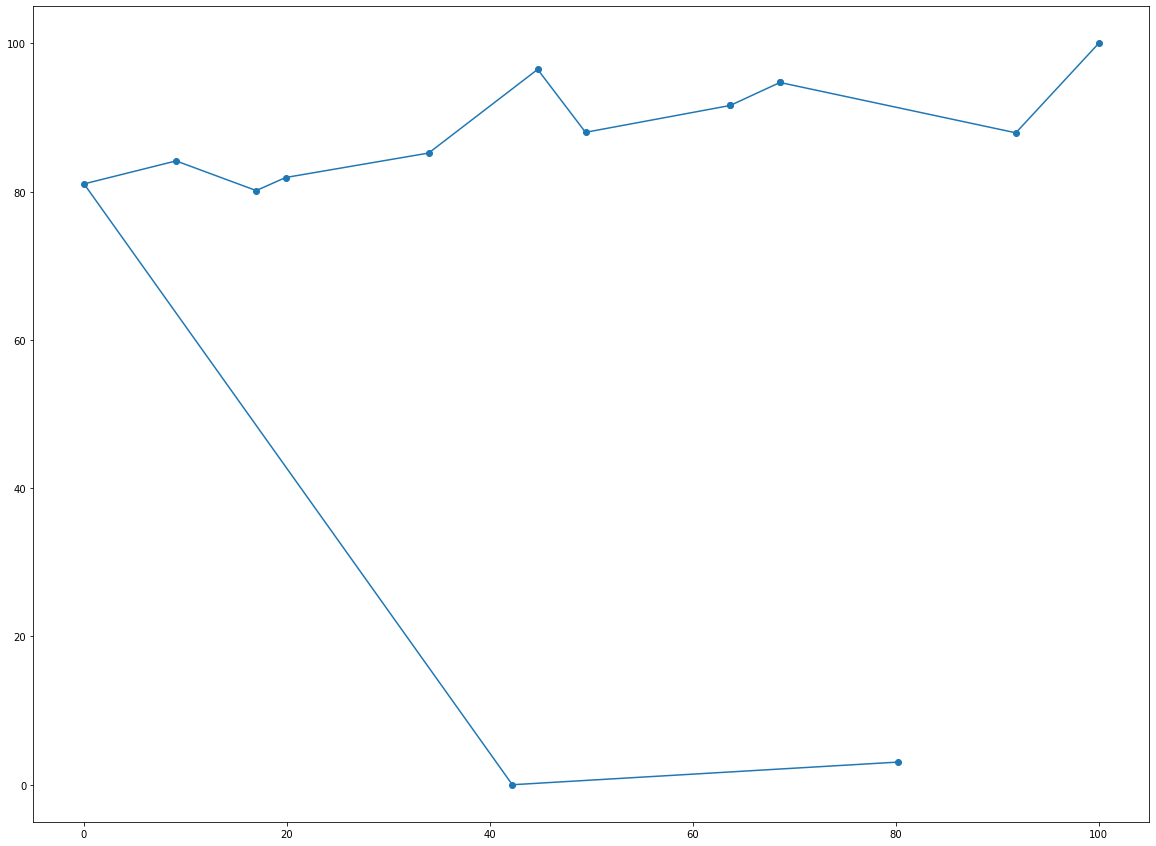

Distance_scaled: 250.43873852032024


In [73]:
plt.figure(figsize=(20,15))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order2 = np.array([scaled2[cycle_route[i]] for i in range(len(cycle_route))])

# Plot the cities.
plt.scatter(scaled2[:,0], scaled2[:,1])

# Plot the path.
plt.plot(new_cities_order2[:,0], new_cities_order2[:,1])
plt.show()

# Print the route as row numbers and the total distance travelled by the path.
print("Distance_scaled: " + str(path_distance(cycle_route, scaled2)))

#### Arrange rows according to route matrix

In [74]:
delivery_order2 = pd.DataFrame(cycle_route, columns=["index"])
delivery_order2

,index
0,14
1,4
2,8
3,13
4,3
5,6
6,5
7,7
8,11
9,10


In [75]:
cycle_df = cycle_df.reset_index(drop=True)

In [76]:
travel2 = pd.concat([cycle_df, delivery_order2], axis=1)
travel2

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee,cluster_label,lat_radians,lon_radians,x,y,index
0,ORDA00121,12.1193,77.6399,4.777,45.10,Bicycle,141.00,10.433114,1,0.211522,1.355072,1333.350883,286.315475,14
1,ORDA00251,12.9369,77.6407,3.560,50.00,Bicycle,211.25,4.621715,0,0.225792,1.355086,1329.044914,305.292891,4
2,ORDA01361,12.1145,77.6036,4.926,41.30,Bicycle,401.00,12.342514,1,0.211438,1.354438,1337.229610,287.031177,8
3,ORDA03791,12.9770,77.5773,4.704,41.12,Bicycle,970.00,10.771145,2,0.226491,1.353979,1335.540607,307.769201,13
4,ORDA07592,12.9150,77.5533,2.075,29.70,Bicycle,351.10,9.773439,0,0.225409,1.353560,1338.413013,306.906299,3
5,ORDA10327,12.9561,77.5921,4.077,24.50,Bicycle,391.20,10.436163,0,0.226127,1.354238,1334.086500,306.921669,6
6,ORDK00127,12.9770,77.5773,4.425,39.12,Bicycle,711.00,10.473663,2,0.226491,1.353979,1335.540607,307.769201,5
7,ORDK01330,13.0417,77.5923,4.937,47.45,Bicycle,232.50,12.060167,2,0.227621,1.354241,1333.605311,308.909552,7
8,ORDK01531,13.0019,77.5713,4.647,49.52,Bicycle,70.50,11.924594,2,0.226926,1.353875,1336.041567,308.496166,11
9,ORDK03474,12.9579,77.6309,4.772,26.11,Bicycle,513.10,13.013231,0,0.226158,1.354915,1329.970259,306.018675,10


In [77]:
travel2.rename(columns = {'index':'delivery_allocation_order'}, inplace = True)

In [78]:
travel2 = travel2[['order_id','customer_lat','customer_lon','distance_to_customer_KM','weight_in_kg',
                   'order_price','delivery_fee','cluster_label','delivery_allocation_order']]

In [79]:
travel2 = travel2.sort_values(by=['delivery_allocation_order'], ascending=True)
travel2

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,order_price,delivery_fee,cluster_label,delivery_allocation_order
13,ORDX06173,13.0019,77.5713,4.232,26.05,672.50,11.121376,2,0
12,ORDX03354,12.9120,77.6256,5.000,32.25,66.40,10.601194,0,1
14,ORDX10010,13.0219,77.5400,4.106,45.97,95.50,11.511673,2,2
4,ORDA07592,12.9150,77.5533,2.075,29.70,351.10,9.773439,0,3
1,ORDA00251,12.9369,77.6407,3.560,50.00,211.25,4.621715,0,4
6,ORDK00127,12.9770,77.5773,4.425,39.12,711.00,10.473663,2,5
5,ORDA10327,12.9561,77.5921,4.077,24.50,391.20,10.436163,0,6
7,ORDK01330,13.0417,77.5923,4.937,47.45,232.50,12.060167,2,7
2,ORDA01361,12.1145,77.6036,4.926,41.30,401.00,12.342514,1,8
11,ORDX00440,12.9442,77.6076,2.926,21.00,394.00,13.914020,0,9


#### Get the first 10 orders to be allocated for delivery to bicycle

In [80]:
# First 10 orders
first_ten = travel2[['order_id','delivery_allocation_order']].head(10)
first_ten = first_ten.reset_index(drop=True)
first_ten

,order_id,delivery_allocation_order
0,ORDX06173,0
1,ORDX03354,1
2,ORDX10010,2
3,ORDA07592,3
4,ORDA00251,4
5,ORDK00127,5
6,ORDA10327,6
7,ORDK01330,7
8,ORDA01361,8
9,ORDX00440,9


### Generating the optimal route for moped

In [81]:
# Define the 'features' and 'labels'
X = moped_df.iloc[:, 1:3]

In [82]:
X

,customer_lat,customer_lon
0,12.9150,77.5533
6,12.9431,77.5731
9,12.9154,77.7011
10,13.0734,77.5464
11,12.9261,77.6221
...,...,...
485,12.9913,77.6409
488,12.9713,77.6401
494,12.1145,77.6036
495,12.9713,77.6401


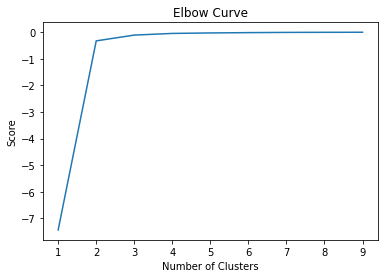

In [83]:
from sklearn.cluster import KMeans

kmeans = []
K_clusters = range(1,10)
for i in K_clusters:
    kmeans.append(KMeans(n_clusters=i))

Y_axis = X[['customer_lat']]
X_axis = X[['customer_lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### Clustering using K-Means and Assigning Clusters to our Data

In [84]:
# 'k-means++' selects initial cluster centers for k-means clustering in a smart way to speed up convergence
kmeans = KMeans(n_clusters = 3, init ='k-means++')

# Compute k-means clustering
kmeans.fit(X)
centers = kmeans.cluster_centers_
clusters = kmeans.predict(X)
X['cluster_label'] = clusters
X.head(10)

,customer_lat,customer_lon,cluster_label
0,12.9150,77.5533,0
6,12.9431,77.5731,0
9,12.9154,77.7011,2
10,13.0734,77.5464,0
11,12.9261,77.6221,2
12,12.9261,77.6221,2
13,12.9770,77.5773,0
16,12.9925,77.5633,0
18,12.9337,77.5900,0
19,12.9119,77.6446,2


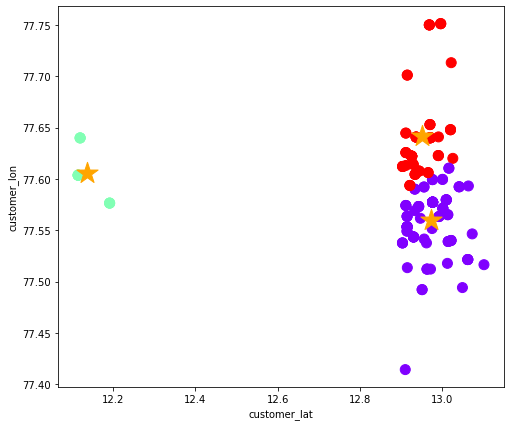

In [85]:
# Visualize the Clusters
plt.figure(figsize=(8,7))
plt.scatter(x=X['customer_lat'], y=X['customer_lon'], c=clusters, s=100, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=500, marker='*')
plt.xlabel('customer_lat')
plt.ylabel('customer_lon')
plt.show()

In [86]:
kmeans.cluster_centers_

array([[12.97345093, 77.55976759],
       [12.1367    , 77.60608182],
       [12.95106232, 77.64218261]])

In [87]:
X = X.loc[:, ['cluster_label']]

In [88]:
# Concat the dataframes
moped_df = pd.concat([moped_df, X], axis=1, join='inner')
print(moped_df.shape)
moped_df.head(10)

(188, 9)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee,cluster_label
0,ORDA00111,12.9150,77.5533,10.621,75.50,Moped,107.00,13.402307,0
6,ORDA01163,12.9431,77.5731,6.117,72.74,Moped,261.00,13.342724,0
9,ORDA01555,12.9154,77.7011,9.515,52.32,Moped,414.00,15.041120,2
10,ORDA01560,13.0734,77.5464,6.500,53.50,Moped,639.20,12.211450,0
11,ORDA01610,12.9261,77.6221,6.264,94.00,Moped,1255.50,15.164450,2
12,ORDA01619,12.9261,77.6221,7.026,55.60,Moped,342.00,15.662966,2
13,ORDA01706,12.9770,77.5773,11.519,92.15,Moped,596.00,15.142412,0
16,ORDA02930,12.9925,77.5633,9.975,72.25,Moped,119.00,12.271116,0
18,ORDA03560,12.9337,77.5900,6.620,90.20,Moped,156.25,14.531390,0
19,ORDA03651,12.9119,77.6446,12.100,60.70,Moped,269.00,14.202938,2


#### Converting Longitude and Latitude into Cartesian X and Y
#### ** R of earth =6371 KM **
#### x = R * cos( radiance(lat) ) * cos(radiance (lon))
#### y = R * cos( radiance(lat) ) * sin(radiance (lon))

In [89]:
from math import radians,cos,sin

lat = moped_df["customer_lat"].map(radians)
lon = moped_df["customer_lon"].map(radians)
x = lon.map(cos)*lat.map(cos)*6371
y= lon.map(cos)*lat.map(sin)*6371

moped_df["lat_radians"] = lat
moped_df["lon_radians"] = lon
moped_df["x"] = x
moped_df["y"] = y
moped_df.head(5)

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee,cluster_label,lat_radians,lon_radians,x,y
0,ORDA00111,12.9150,77.5533,10.621,75.50,Moped,107.0,13.402307,0,0.225409,1.353560,1338.413013,306.906299
6,ORDA01163,12.9431,77.5731,6.117,72.74,Moped,261.0,13.342724,0,0.225900,1.353906,1336.166963,307.081107
9,ORDA01555,12.9154,77.7011,9.515,52.32,Moped,414.0,15.041120,2,0.225416,1.356140,1322.764093,303.327626
10,ORDA01560,13.0734,77.5464,6.500,53.50,Moped,639.2,12.211450,0,0.228174,1.353440,1338.289210,310.774769
11,ORDA01610,12.9261,77.6221,6.264,94.00,Moped,1255.5,15.164450,2,0.225603,1.354761,1331.071465,305.494279


In [90]:
new_df3 = moped_df[['x','y']]
new_df3.head(5)

,x,y
0,1338.413013,306.906299
6,1336.166963,307.081107
9,1322.764093,303.327626
10,1338.289210,310.774769
11,1331.071465,305.494279


In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
scaled_df3 = scaler.fit_transform(new_df3)
scaled_df3 = pd.DataFrame(scaled_df3, columns=['x', 'y'])

In [92]:
scaled3 = np.asarray(scaled_df3)
scaled3

array([[ 59.19364562,  79.60687959],
       [ 52.97650791,  80.2827102 ],
       [ 15.87693942,  65.7712513 ],
       [ 58.85095391,  94.56290204],
       [ 38.87200687,  74.14782041],
       [ 38.87200687,  74.14782041],
       [ 51.24273442,  82.94297417],
       [ 55.11247915,  85.66114859],
       [ 48.16482567,  77.847109  ],
       [ 32.48790125,  70.76116858],
       [ 32.93020977,  76.51055273],
       [ 55.91794743,   2.76700212],
       [  0.75663454,  65.95378427],
       [ 47.28764372,  76.42857408],
       [ 53.14584612,  77.3757248 ],
       [ 29.19024829,  75.24130386],
       [ 29.91491801,  80.19294534],
       [ 42.85302569,  77.13725286],
       [ 70.53959666,  87.86614309],
       [ 38.87200687,  74.14782041],
       [ 44.80442412,  80.83281152],
       [ 68.15801279,  91.82961108],
       [ 76.57573841,  88.66040605],
       [ 15.87693942,  65.7712513 ],
       [ 51.24273442,  82.94297417],
       [  0.        ,  68.29356018],
       [  0.75663454,  65.95378427],
 

#### Find a good route with 2-opt

In [93]:
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
moped_route = two_opt(scaled3, 0.001)
moped_route

array([ 96,  87,  44,  11,  39,  48, 130, 185, 167, 138,  31, 141, 181,
        77, 178, 168, 165, 158,  40,  19,   4,   5,  95, 122,  37, 107,
        70, 119, 125, 172,  85,  13, 127, 171,  90, 163, 153,  17,  62,
       154, 150,  99,  38,  41,  20,  88, 177,   8,  72, 179,  14, 121,
       103, 146,   1,  47, 140, 145,  67,  63,  71, 136, 134,   0,  68,
       182, 162, 176, 149,  57, 132,  64, 169,  82,  92, 147, 142,  58,
       151,  30,  29,  89,  49,  86, 143,  45, 101, 114,  34,  21,  81,
       180,  18, 131,  22,  80, 112,  54, 109, 115, 164, 175, 126,   3,
        65,   7,  55, 187,  27, 160,  42,  51, 102, 137,  66,  50,  46,
        43,  32,  28,  24,   6, 155,  84, 128, 129, 161, 159, 110, 117,
       133, 135, 105, 100,  98,  94, 120,  61, 152,  79,  93,  33,  53,
       116, 118,  73,  83, 157,  69, 123,  74, 166, 170,  52,  16, 111,
        36, 183, 113,  59,  60,  35, 124,  97,  10, 139, 184, 186, 173,
       156, 106, 108, 144,  76,   9,  56,  78,  15,   2,  23,  7

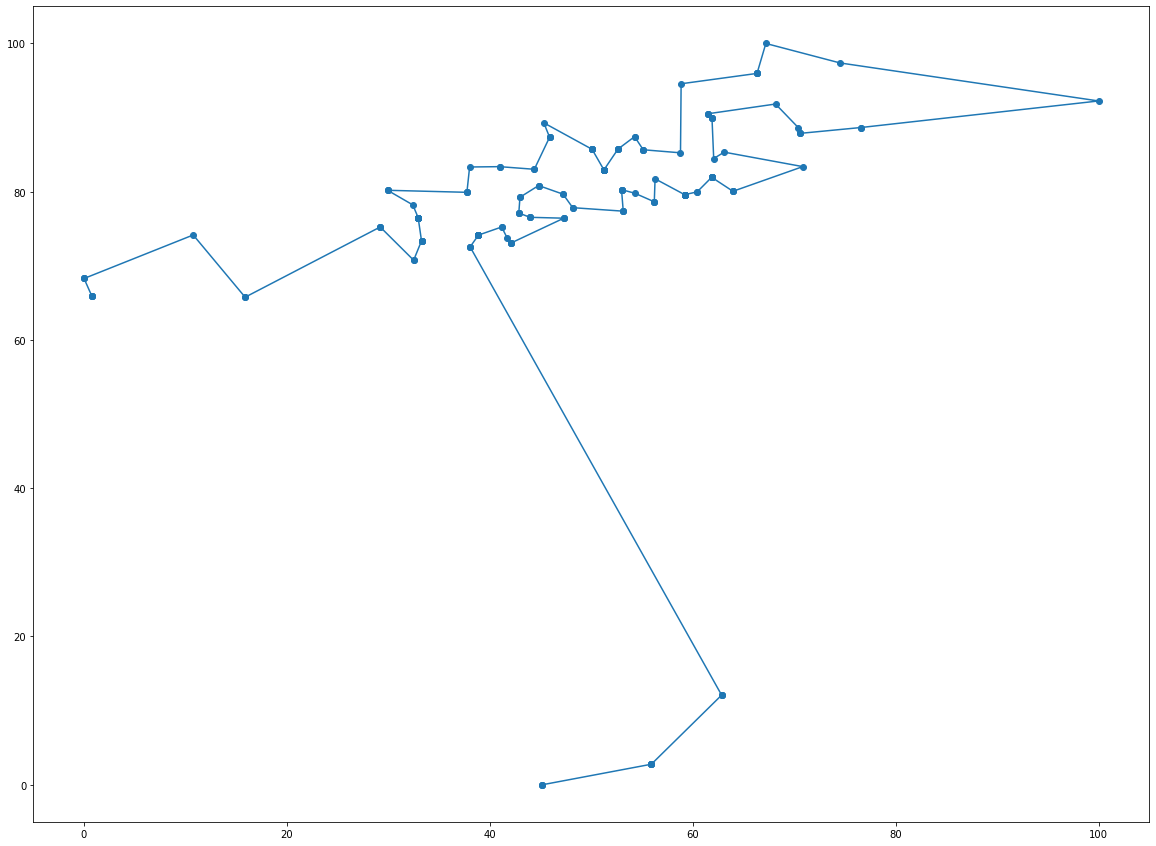

Distance_scaled: 360.4376948436078


In [94]:
plt.figure(figsize=(20,15))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order3 = np.array([scaled3[moped_route[i]] for i in range(len(moped_route))])

# Plot the cities.
plt.scatter(scaled3[:,0], scaled3[:,1])

# Plot the path.
plt.plot(new_cities_order3[:,0], new_cities_order3[:,1])
plt.show()

# Print the route as row numbers and the total distance travelled by the path.
print("Distance_scaled: " + str(path_distance(moped_route, scaled3)))

#### Arrange rows according to route matrix

In [95]:
delivery_order3 = pd.DataFrame(moped_route, columns=["index"])
delivery_order3

,index
0,96
1,87
2,44
3,11
4,39
...,...
183,25
184,26
185,148
186,104


In [96]:
moped_df = moped_df.reset_index(drop=True)

In [97]:
travel3 = pd.concat([moped_df, delivery_order3], axis=1)
travel3

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee,cluster_label,lat_radians,lon_radians,x,y,index
0,ORDA00111,12.9150,77.5533,10.621,75.50,Moped,107.0,13.402307,0,0.225409,1.353560,1338.413013,306.906299,96
1,ORDA01163,12.9431,77.5731,6.117,72.74,Moped,261.0,13.342724,0,0.225900,1.353906,1336.166963,307.081107,87
2,ORDA01555,12.9154,77.7011,9.515,52.32,Moped,414.0,15.041120,2,0.225416,1.356140,1322.764093,303.327626,44
3,ORDA01560,13.0734,77.5464,6.500,53.50,Moped,639.2,12.211450,0,0.228174,1.353440,1338.289210,310.774769,11
4,ORDA01610,12.9261,77.6221,6.264,94.00,Moped,1255.5,15.164450,2,0.225603,1.354761,1331.071465,305.494279,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,ORDZ06591,12.9913,77.6409,9.005,74.00,Moped,405.5,15.099447,2,0.226741,1.355089,1328.733284,306.549744,25
184,ORDZ07192,12.9713,77.6401,6.613,51.20,Moped,371.5,15.040747,2,0.226392,1.355075,1328.924886,306.105414,26
185,ORDZ09411,12.1145,77.6036,6.320,74.75,Moped,313.0,11.525647,1,0.211438,1.354438,1337.229610,287.031177,148
186,ORDZ09416,12.9713,77.6401,13.136,55.42,Moped,542.5,15.401716,2,0.226392,1.355075,1328.924886,306.105414,104


In [98]:
travel3.rename(columns = {'index':'delivery_allocation_order'}, inplace = True)

In [99]:
travel3 = travel3[['order_id','customer_lat','customer_lon','distance_to_customer_KM','weight_in_kg',
                   'order_price','delivery_fee','cluster_label','delivery_allocation_order']]

In [100]:
travel3 = travel3.sort_values(by=['delivery_allocation_order'], ascending=True)
travel3

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,order_price,delivery_fee,cluster_label,delivery_allocation_order
63,ORDI01477,12.9149,77.5635,6.551,55.50,917.40,12.154514,0,0
54,ORDC06134,13.0496,77.4941,11.131,91.20,124.00,15.105221,0,1
178,ORDZ02516,12.9261,77.6221,9.955,91.10,960.00,11.279413,2,2
103,ORDJ07994,12.9431,77.5731,11.605,65.30,313.00,12.399717,0,3
20,ORDA06072,12.9766,77.5993,6.346,93.10,164.50,13.319596,0,4
...,...,...,...,...,...,...,...,...,...
157,ORDX09591,13.0012,77.5995,7.006,51.35,141.00,13.065708,0,183
166,ORDY04451,12.9910,77.6227,9.059,65.59,255.00,13.311721,2,184
7,ORDA02930,12.9925,77.5633,9.975,72.25,119.00,12.271116,0,185
167,ORDY05016,12.1911,77.5764,9.919,58.60,394.75,14.239701,1,186


#### Get the first 10 orders to be allocated for delivery to moped

In [101]:
# First 10 orders
first_ten = travel3[['order_id','delivery_allocation_order']].head(10)
first_ten = first_ten.reset_index(drop=True)
first_ten

,order_id,delivery_allocation_order
0,ORDI01477,0
1,ORDC06134,1
2,ORDZ02516,2
3,ORDJ07994,3
4,ORDA06072,4
5,ORDA06747,5
6,ORDK05501,6
7,ORDJ09761,7
8,ORDC03064,8
9,ORDZ01513,9


### Generating the optimal route for delivery van

In [102]:
# Define the 'features' and 'labels'
X = van_df.iloc[:, 1:3]

In [103]:
X

,customer_lat,customer_lon
2,12.9561,77.5921
4,13.0151,77.5390
7,12.9561,77.5921
14,13.0417,77.5923
25,12.9343,77.6044
...,...,...
482,12.9706,77.6529
487,12.9635,77.5121
489,13.0206,77.6479
490,12.9166,77.4904


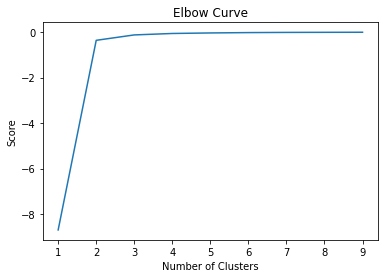

In [104]:
from sklearn.cluster import KMeans

kmeans = []
K_clusters = range(1,10)
for i in K_clusters:
    kmeans.append(KMeans(n_clusters=i))

Y_axis = X[['customer_lat']]
X_axis = X[['customer_lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#### Clustering using K-Means and Assigning Clusters to our Data 

In [105]:
# 'k-means++' selects initial cluster centers for k-means clustering in a smart way to speed up convergence
kmeans = KMeans(n_clusters = 3, init ='k-means++')

# Compute k-means clustering
kmeans.fit(X)
centers = kmeans.cluster_centers_
clusters = kmeans.predict(X)
X['cluster_label'] = clusters
X.head(10)

,customer_lat,customer_lon,cluster_label
2,12.9561,77.5921,0
4,13.0151,77.5390,0
7,12.9561,77.5921,0
14,13.0417,77.5923,0
25,12.9343,77.6044,2
35,13.0019,77.5713,0
37,12.9119,77.5741,0
41,12.9369,77.6407,2
44,12.9335,77.5691,0
46,12.9691,77.7500,2


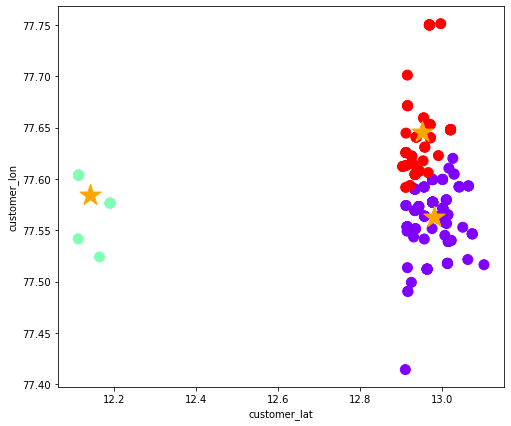

In [106]:
# Visualize the Clusters
plt.figure(figsize=(8,7))
plt.scatter(x=X['customer_lat'], y=X['customer_lon'], c=clusters, s=100, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=500, marker='*')
plt.xlabel('customer_lat')
plt.ylabel('customer_lon')
plt.show()

In [107]:
kmeans.cluster_centers_

array([[12.98037083, 77.563335  ],
       [12.14188462, 77.58433846],
       [12.95100758, 77.64597879]])

In [108]:
X = X.loc[:, ['cluster_label']]

In [109]:
# Concat the dataframes
van_df = pd.concat([van_df, X], axis=1, join='inner')
print(van_df.shape)
van_df.head(10)

(199, 9)


,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee,cluster_label
2,ORDA00149,12.9561,77.5921,20.673,724.50,Delivery van,1051.60,16.634749,0
4,ORDA00506,13.0151,77.5390,15.953,117.25,Delivery van,222.50,15.251116,0
7,ORDA01360,12.9561,77.5921,16.254,210.25,Delivery van,493.00,14.313527,0
14,ORDA01713,13.0417,77.5923,16.556,110.10,Delivery van,222.25,17.295640,0
25,ORDA04713,12.9343,77.6044,16.760,465.00,Delivery van,351.25,13.441149,2
35,ORDA06644,13.0019,77.5713,20.692,329.00,Delivery van,694.00,11.761732,0
37,ORDA07111,12.9119,77.5741,16.617,297.20,Delivery van,172.00,13.470901,0
41,ORDA09040,12.9369,77.6407,17.625,459.00,Delivery van,549.00,11.155354,2
44,ORDA09142,12.9335,77.5691,19.705,101.50,Delivery van,222.25,13.544102,0
46,ORDA09472,12.9691,77.7500,21.204,201.25,Delivery van,459.00,11.116437,2


#### Converting Longitude and Latitude into Cartesian X and Y
#### ** R of earth =6371 KM **
#### x = R * cos( radiance(lat) ) * cos(radiance (lon))
#### y = R * cos( radiance(lat) ) * sin(radiance (lon)) 

In [110]:
from math import radians,cos,sin

lat = van_df["customer_lat"].map(radians)
lon = van_df["customer_lon"].map(radians)
x = lon.map(cos)*lat.map(cos)*6371
y= lon.map(cos)*lat.map(sin)*6371

van_df["lat_radians"] = lat
van_df["lon_radians"] = lon
van_df["x"] = x
van_df["y"] = y
van_df.head(5)

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee,cluster_label,lat_radians,lon_radians,x,y
2,ORDA00149,12.9561,77.5921,20.673,724.50,Delivery van,1051.60,16.634749,0,0.226127,1.354238,1334.086500,306.921669
4,ORDA00506,13.0151,77.5390,15.953,117.25,Delivery van,222.50,15.251116,0,0.227156,1.353311,1339.387569,309.593811
7,ORDA01360,12.9561,77.5921,16.254,210.25,Delivery van,493.00,14.313527,0,0.226127,1.354238,1334.086500,306.921669
14,ORDA01713,13.0417,77.5923,16.556,110.10,Delivery van,222.25,17.295640,0,0.227621,1.354241,1333.605311,308.909552
25,ORDA04713,12.9343,77.6044,16.760,465.00,Delivery van,351.25,13.441149,2,0.225746,1.354452,1332.901291,306.115058


In [111]:
new_df4 = van_df[['x','y']]
new_df4.head(5)

,x,y
2,1334.086500,306.921669
4,1339.387569,309.593811
7,1334.086500,306.921669
14,1333.605311,308.909552
25,1332.901291,306.115058


In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
scaled_df4 = scaler.fit_transform(new_df4)
scaled_df4 = pd.DataFrame(scaled_df4, columns=['x', 'y'])

In [113]:
scaled4 = np.asarray(scaled_df4)
scaled4

array([[ 47.21771959,  79.08765655],
       [ 61.89124528,  89.71250458],
       [ 47.21771959,  79.08765655],
       [ 45.88577167,  86.99178617],
       [ 43.93702221,  75.88044691],
       [ 52.62940548,  85.34810176],
       [ 53.14584612,  76.73189586],
       [ 33.26245003,  72.61138687],
       [ 54.29068509,  79.21797217],
       [  0.75663454,  64.98491616],
       [  0.75663454,  64.98491616],
       [ 55.91794743,   0.        ],
       [ 42.85302569,  76.48663762],
       [  0.75663454,  64.98491616],
       [ 59.19364562,  79.02654361],
       [ 38.87200687,  73.41213358],
       [ 41.71578619,  72.98736656],
       [ 55.52364776,  81.92047102],
       [ 56.53475952,  87.15181949],
       [ 35.82383458,  75.49721462],
       [ 59.19364562,  79.02654361],
       [ 58.85095391,  94.40817616],
       [  0.75663454,  64.98491616],
       [ 42.12681279,  72.34424303],
       [ 62.06284198,  84.03271505],
       [ 29.91491801,  79.62928729],
       [ 29.91491801,  79.62928729],
 

#### Find a good route with 2-opt

In [114]:
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
van_route = two_opt(scaled4, 0.001)
van_route

array([185, 161, 168, 155,  11,  42,  62, 115, 136, 156, 182,  90, 141,
       164, 121, 197, 183,  47,  24,  44,  86, 107, 119, 124, 195, 173,
       181, 102,  96, 122,  37, 108, 149,  21, 113,  72, 127, 131, 171,
         1,  87,  91,  39,  18,  34,  32,  93,  83,  74,  49,  77,  31,
        85, 133, 188,  98,  82,  20, 186,  48,  14, 128, 146, 120,  99,
        17,  28, 116,   8, 138,  73,  80,  92, 178, 175,  71, 187,  43,
       139, 172,  69, 101,  88,  75,  45,  57, 135, 190, 162, 163, 153,
        29,   5, 111, 106, 148, 123,  55,  56,  51, 150,  66,  78,  41,
         3,  50,  36,  27, 151,  46, 160, 158,  30, 179, 191, 104, 177,
       167, 165,   2,   0, 110, 134,  40,  54,  61,  33,  95,  89,   6,
       109,  84, 137, 174,   4, 118, 117,  52, 143, 132,  12,  60,  63,
       192, 114,  64,  81,  25,  26, 105,  53, 130,  68, 196, 180, 125,
       152, 145,  19, 154, 157,  58,  35,  16,  23,  79, 112, 170,  15,
        38, 159, 126,  97, 166, 193, 142, 169, 100,   7, 198, 14

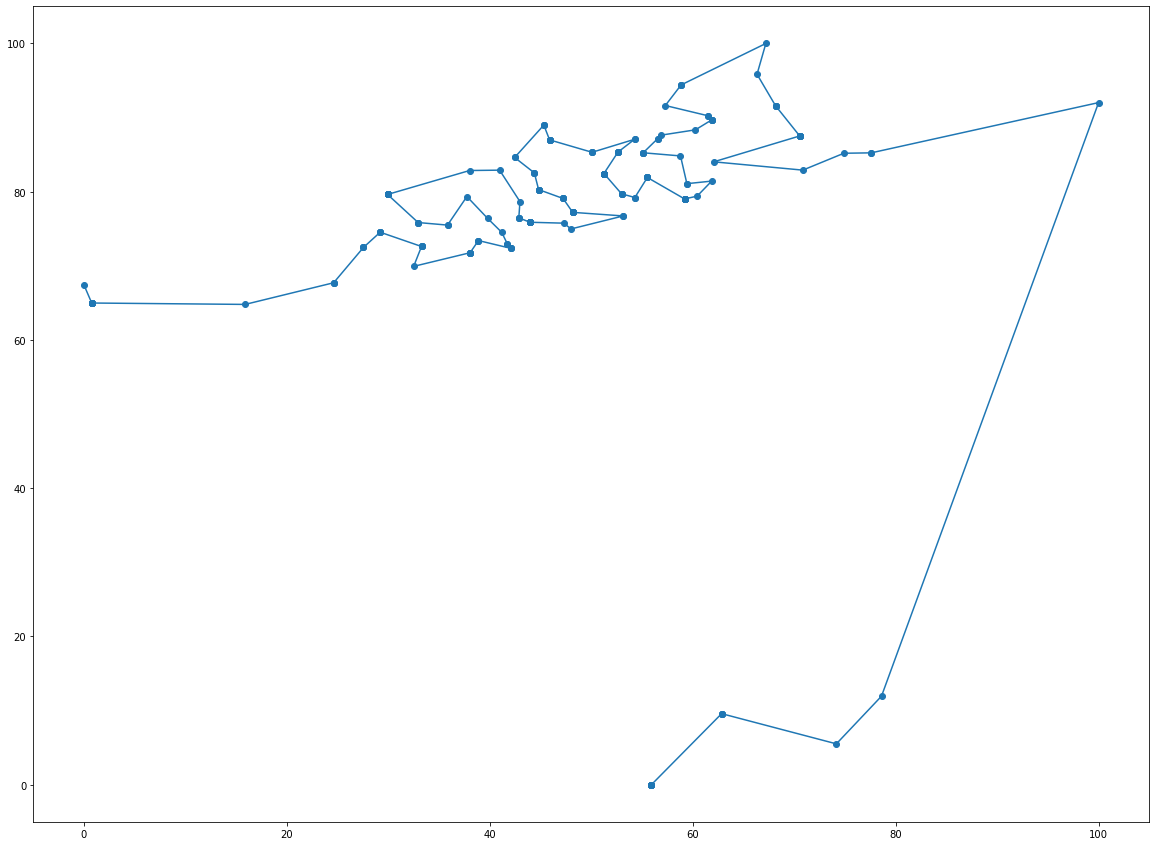

Distance_scaled: 370.19499140796484


In [115]:
plt.figure(figsize=(20,15))
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order4 = np.array([scaled4[van_route[i]] for i in range(len(van_route))])

# Plot the cities.
plt.scatter(scaled4[:,0], scaled4[:,1])

# Plot the path.
plt.plot(new_cities_order4[:,0], new_cities_order4[:,1])
plt.show()

# Print the route as row numbers and the total distance travelled by the path.
print("Distance_scaled: " + str(path_distance(van_route, scaled4)))

#### Arrange rows according to route matrix

In [116]:
delivery_order4 = pd.DataFrame(van_route, columns=["index"])
delivery_order4

,index
0,185
1,161
2,168
3,155
4,11
...,...
194,13
195,10
196,9
197,76


In [117]:
van_df = van_df.reset_index(drop=True)

In [118]:
travel4 = pd.concat([van_df, delivery_order4], axis=1)
travel4

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,vehicle,order_price,delivery_fee,cluster_label,lat_radians,lon_radians,x,y,index
0,ORDA00149,12.9561,77.5921,20.6730,724.50,Delivery van,1051.60,16.634749,0,0.226127,1.354238,1334.086500,306.921669,185
1,ORDA00506,13.0151,77.5390,15.9530,117.25,Delivery van,222.50,15.251116,0,0.227156,1.353311,1339.387569,309.593811,161
2,ORDA01360,12.9561,77.5921,16.2540,210.25,Delivery van,493.00,14.313527,0,0.226127,1.354238,1334.086500,306.921669,168
3,ORDA01713,13.0417,77.5923,16.5560,110.10,Delivery van,222.25,17.295640,0,0.227621,1.354241,1333.605311,308.909552,155
4,ORDA04713,12.9343,77.6044,16.7600,465.00,Delivery van,351.25,13.441149,2,0.225746,1.354452,1332.901291,306.115058,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,ORDZ06270,12.9706,77.6529,17.1440,466.75,Delivery van,453.00,16.022052,2,0.226380,1.355299,1327.573760,305.777115,13
195,ORDZ07060,12.9635,77.5121,19.4650,104.10,Delivery van,270.10,16.211153,0,0.226256,1.352841,1342.511937,309.042610,10
196,ORDZ07342,13.0206,77.6479,19.7240,210.75,Delivery van,375.00,14.723921,2,0.227252,1.355212,1327.835559,307.057888,9
197,ORDZ07514,12.9166,77.4904,16.1116,155.00,Delivery van,531.75,14.060196,0,0.225437,1.352463,1345.060594,308.470166,76


In [119]:
travel4.rename(columns = {'index':'delivery_allocation_order'}, inplace = True)

In [120]:
travel4 = travel4[['order_id','customer_lat','customer_lon','distance_to_customer_KM','weight_in_kg',
                   'order_price','delivery_fee','cluster_label','delivery_allocation_order']]

In [121]:
travel4 = travel4.sort_values(by=['delivery_allocation_order'], ascending=True)
travel4

,order_id,customer_lat,customer_lon,distance_to_customer_KM,weight_in_kg,order_price,delivery_fee,cluster_label,delivery_allocation_order
120,ORDJ05632,12.9570,77.5637,16.754,231.2,101.00,11.711610,0,0
39,ORDB09146,13.0109,77.5565,20.729,360.0,421.25,5.391661,0,1
119,ORDJ05449,12.9635,77.5121,19.657,441.0,691.50,12.470569,0,2
104,ORDJ02030,12.9766,77.5993,16.142,757.5,275.00,13.415039,0,3
134,ORDK00273,12.9561,77.5921,15.453,269.0,213.25,14.730760,0,4
...,...,...,...,...,...,...,...,...,...
182,ORDZ01027,12.1911,77.5764,17.611,420.0,313.50,13.750367,1,194
24,ORDB04420,12.9565,77.5414,17.740,537.0,136.50,11.192697,0,195
153,ORDX07192,12.9770,77.5773,15.260,192.1,914.50,15.171752,0,196
15,ORDB01337,12.9261,77.6221,19.361,262.0,145.00,14.394366,2,197


#### Get the first 10 orders to be allocated for delivery to delivery van

In [122]:
# First 10 orders
first_ten = travel4[['order_id','delivery_allocation_order']].head(10)
first_ten = first_ten.reset_index(drop=True)
first_ten

,order_id,delivery_allocation_order
0,ORDJ05632,0
1,ORDB09146,1
2,ORDJ05449,2
3,ORDJ02030,3
4,ORDK00273,4
5,ORDJ00665,5
6,ORDJ09572,6
7,ORDY07593,7
8,ORDI01296,8
9,ORDZ07342,9


### Export data

In [123]:
travel1.to_csv(r'C:\Users\Rajashri\Desktop\food_analysis\Package delivery\pedestrian.csv', index=False)
print("Successfully Exported!!")

travel2.to_csv(r'C:\Users\Rajashri\Desktop\food_analysis\Package delivery\bicycle.csv', index=False)
print("Successfully Exported!!")

travel3.to_csv(r'C:\Users\Rajashri\Desktop\food_analysis\Package delivery\moped.csv', index=False)
print("Successfully Exported!!")

travel4.to_csv(r'C:\Users\Rajashri\Desktop\food_analysis\Package delivery\delivery van.csv', index=False)
print("Successfully Exported!!")

Successfully Exported!!
Successfully Exported!!
Successfully Exported!!
Successfully Exported!!
